<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

<p style="color:yellow"><strong>DATASET: HEART DISEASE UCI</strong></p>

**Descripción:** Este conjunto de datos contiene información médica de pacientes, incluyendo variables como edad, sexo, presión arterial, colesterol, frecuencia cardíaca máxima, entre otros. El objetivo es predecir la presencia o ausencia de enfermedad cardíaca.

**Objetivo: Aplicar las etapas de CRISP-DM utilizando el dataset de enfermedad cardíaca.​**

**Variable Objetivo:** "num"

**0** → No hay enfermedad  
**1, 2, 3, 4** → Sí hay enfermedad, en diferentes niveles de severidad

<p style="color:yellow"><strong>VARIABLES</strong></p>

**1. id:** Identificador único para cada paciente. No aporta valor predictivo, se puede eliminar.  
**2. age:** Edad del paciente en años.  
**3. sex:** Sexo del paciente: "Male" o "Female".  
**4. dataset:** Lugar de origen del estudio (Cleveland, VA Long Beach, etc.). Puede usarse como agrupador o eliminarse si no es relevante.   
**5. cp:** Tipo de dolor en el pecho: typical angina, atypical angina, non-anginal, asymptomatic. Variable relevante para predicción.  
**6. trestbps:** Presión arterial en reposo (mm Hg).  
**7. chol:** Nivel de colesterol sérico en sangre (mg/dl).  
**8. fbs:** Azúcar en sangre en ayunas > 120 mg/dl: True (sí) o False (no).  
**9. restecg:** Resultados del electrocardiograma en reposo: normal, st-t abnormality, lv hypertrophy.  
**10. thalach:** Frecuencia cardíaca máxima alcanzada durante una prueba de esfuerzo.  
**11. exang:** Angina inducida por ejercicio: True o False.  
**12. oldpeak:** Depresión del segmento ST (medida de anormalidad en ECG) inducida por ejercicio.  
**13. slope:** Pendiente del segmento ST durante el ejercicio: upsloping, flat, downsloping.  
**14. ca:** Número de vasos principales coloreados por fluoroscopía (0 a 3). Tiene valores nulos.  
**15. thal:** Resultado del test de talio: normal, fixed defect, reversible defect. Tiene valores nulos.  
**16. num:** Variable objetivo

<p style="color:red"><strong>CRISP DM - 3 PRIMERAS ETAPAS</strong></p>

<p style="color:yellow"><strong>1. COMPRENSIÓN DEL NEGOCIO</strong></p>


**Definir el problema:** ¿Cómo predecir la presencia de enfermedad cardíaca en pacientes?

**Establecer objetivos:** Mejorar la detección temprana de enfermedades cardíacas mediante modelos predictivos.​

<p style="color:yellow"><strong>2. COMPRENSIÓN DE LOS DATOS (EDA)</strong></p>

Explorar las variables disponibles.

Identificar la distribución de los datos y la presencia de valores nulos.​

<p style="color:yellow"><strong>3. PREPARACIÓN DE LOS DATOS</strong></p>

Imputar valores nulos utilizando técnicas apropiadas.

Aplicar normalización o estandarización a las variables numéricas.

<p style="color:red"><strong>INTEGRANTES</strong></p>

**1. NOMBRE Juan Rodriguez**

**2. NOMBRE Gabriel Ibañez**  

**3. NOMBRE Benjamin Huenupe**  
<p style="color:red"><strong>PARALELO:</strong> 004 o 005</p>

<p style="color:yellow"><strong>RECUERDE COMENTAR TODO LO QUE HACE</strong></p>

<p style="color:blue"><strong>1. COMPRENSIÓN DEL NEGOCIO</strong></p>

Objetivo:
Predecir la presencia de enfermedad cardíaca en pacientes utilizando características clínicas. Esto ayudará a mejorar el diagnóstico temprano y tomar decisiones médicas proactivas.

Problema:
Detectar si un paciente tiene o no enfermedad cardíaca (num > 0) en base a variables clínicas.

Meta:
Crear un modelo de clasificación binaria con alta precisión, sensibilidad y especificidad.

<p style="color:blue"><strong>2. COMPRENSIÓN DE LOS DATOS</strong></p>

IMPORTACION DE LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("heart_disease_uci.csv")

# Ver primeras filas
print(df.head())

# Ver nombres exactos de columnas
print(df.columns.tolist())


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
['id', '

El código importa librerías para análisis y visualización de datos, carga el archivo `heart_disease_uci.csv` en un DataFrame llamado `df`, muestra las primeras filas del conjunto de datos para una vista preliminar y finalmente imprime la lista completa de nombres de columnas para identificar las variables disponibles.

In [ ]:
# Reemplazar valores '?' por NaN
df.replace("?", np.nan, inplace=True)

# Revisar tipos y nulos
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs         

Este bloque de código reemplaza los valores `'?'` por `NaN` para identificar correctamente los datos faltantes, luego utiliza `df.info()` para mostrar la estructura del DataFrame, incluyendo tipos de datos y cantidad de valores no nulos por columna, y finalmente `df.isnull().sum()` para contar cuántos valores faltan en cada columna, facilitando así la detección y tratamiento de datos incompletos.

In [ ]:
# Crear columna 'target' a partir de 'num'
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Seleccionar columnas numéricas (excepto 'id', 'num' y 'target' si no quieres graficarlas)
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
for col in ['id', 'num', 'target']:
    if col in variables_numericas:
        variables_numericas.remove(col)

Este bloque crea una nueva columna llamada `target` a partir de `num`, asignando 1 si el valor es mayor que 0 (presencia de enfermedad) y 0 en caso contrario, y luego selecciona únicamente las columnas numéricas del DataFrame excluyendo `id`, `num` y `target`, ya que estas no se desean incluir en análisis o visualización de correlaciones.

<ipython-input-23-98ef9f689432>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


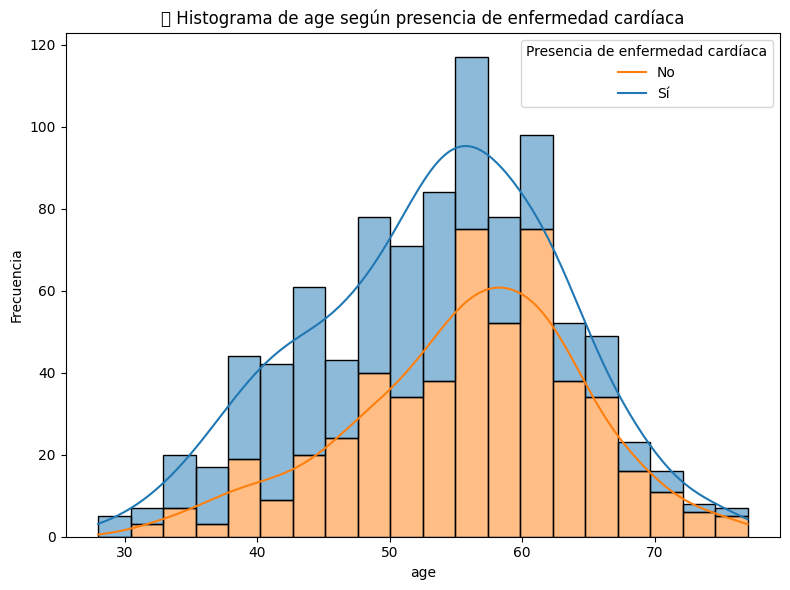

<ipython-input-23-98ef9f689432>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


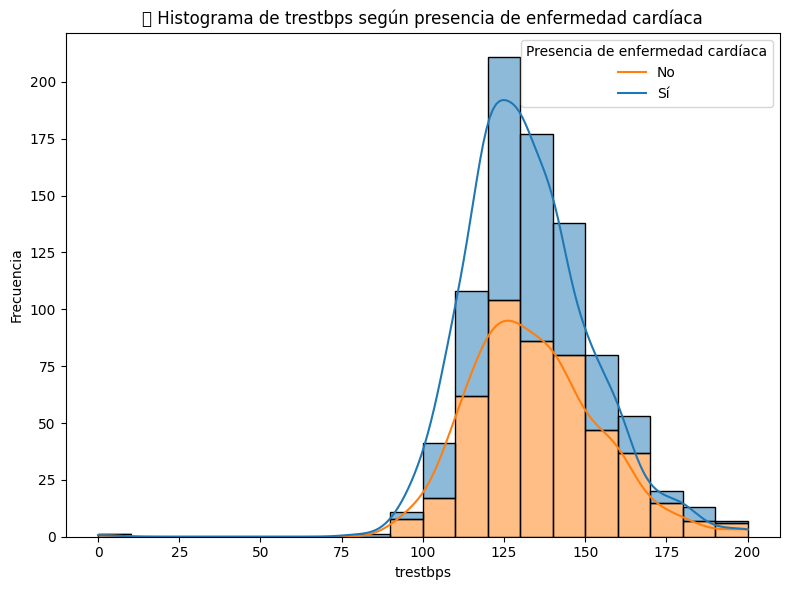

<ipython-input-23-98ef9f689432>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


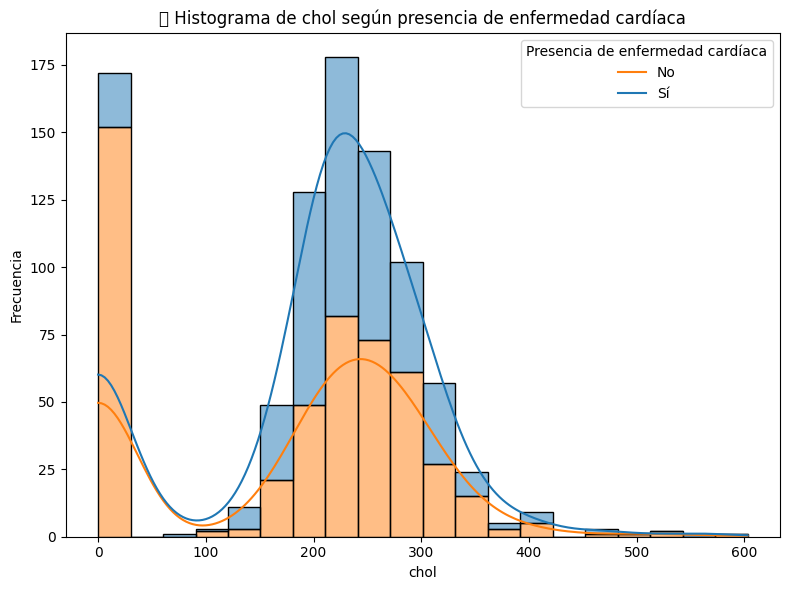

<ipython-input-23-98ef9f689432>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


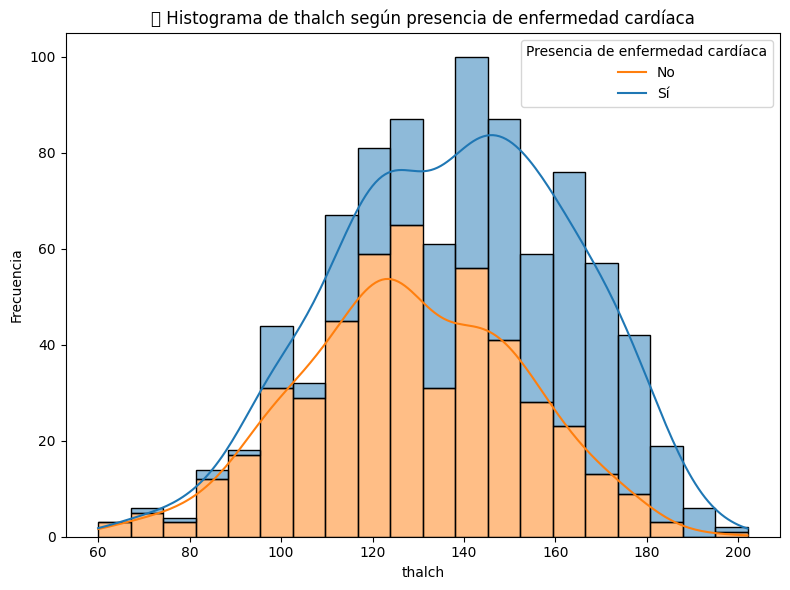

<ipython-input-23-98ef9f689432>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


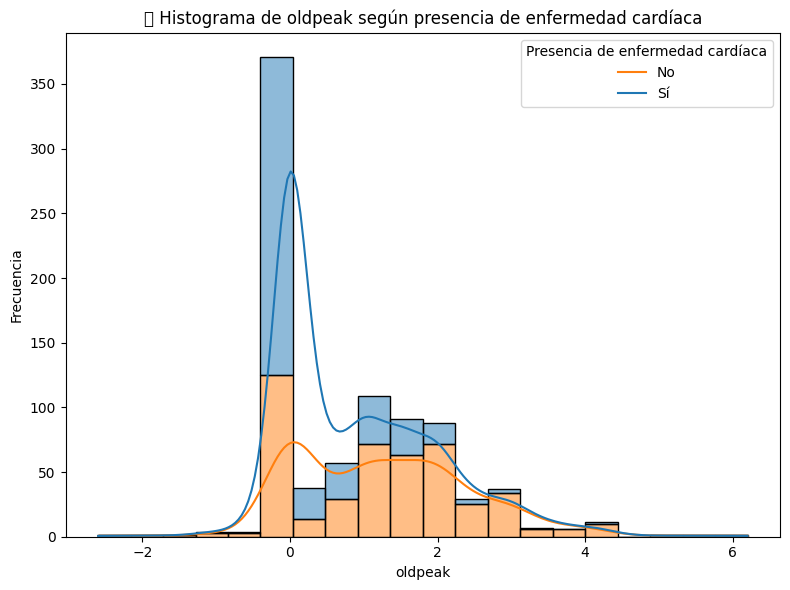

<ipython-input-23-98ef9f689432>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


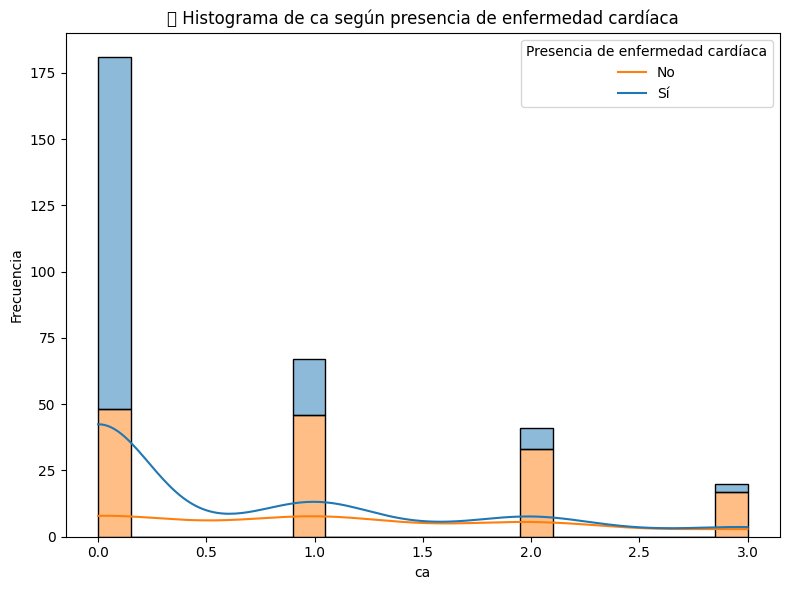

In [ ]:
# Crear histogramas para cada variable numérica respecto a 'target'
import seaborn as sns
import matplotlib.pyplot as plt

for var in variables_numericas:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var, hue='target', multiple="stack", kde=True, bins=20)
    plt.title(f'📊 Histograma de {var} según presencia de enfermedad cardíaca')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.legend(title='Presencia de enfermedad cardíaca', labels=['No', 'Sí'])
    plt.tight_layout()
    plt.show()

Este bloque genera histogramas para cada variable numérica con respecto a la variable `target`, permitiendo visualizar la distribución de los datos según la presencia (1) o ausencia (0) de enfermedad cardíaca; utiliza `seaborn` para crear gráficos apilados con líneas de densidad y ajusta detalles visuales como etiquetas, títulos y leyendas para facilitar la interpretación.

<ipython-input-24-11f9db8d7768>:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


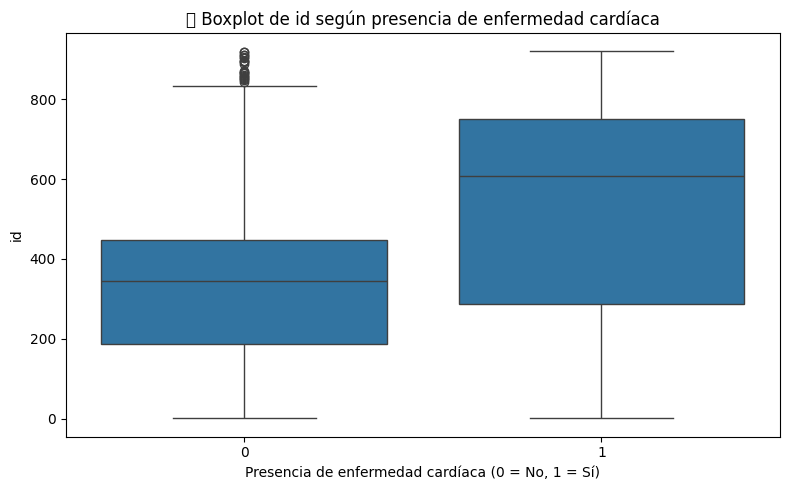

<ipython-input-24-11f9db8d7768>:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


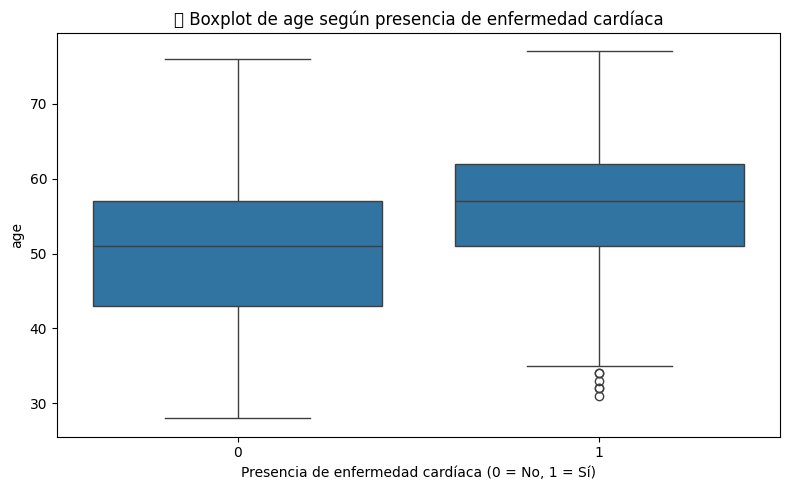

<ipython-input-24-11f9db8d7768>:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


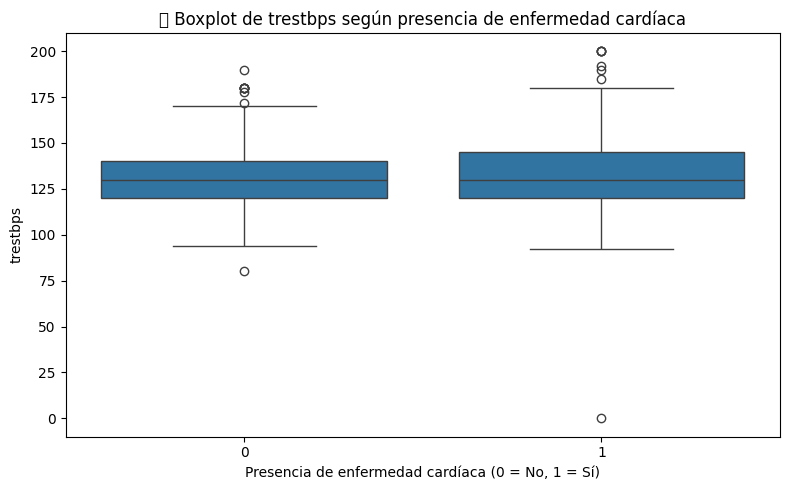

<ipython-input-24-11f9db8d7768>:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


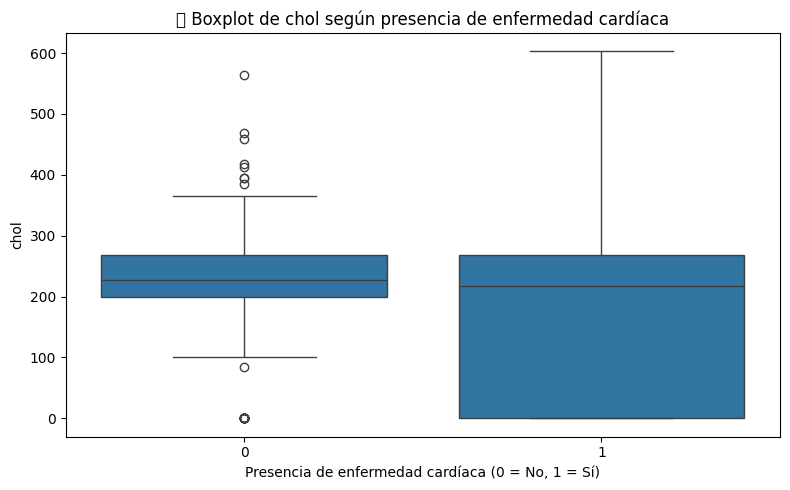

<ipython-input-24-11f9db8d7768>:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


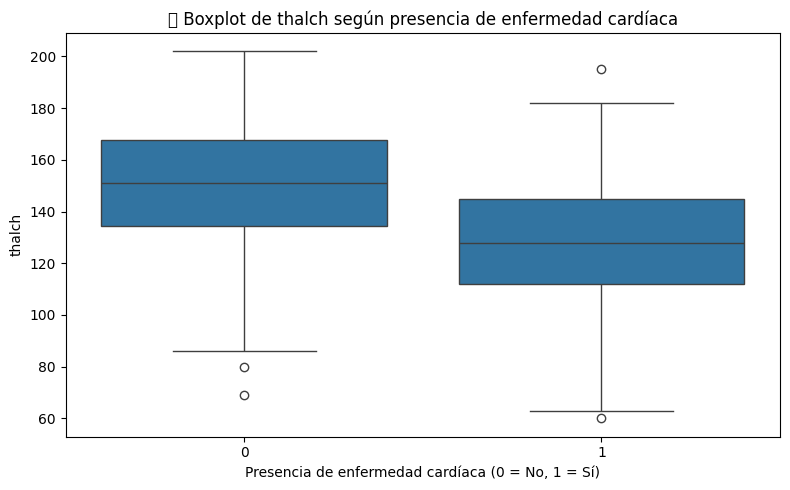

<ipython-input-24-11f9db8d7768>:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


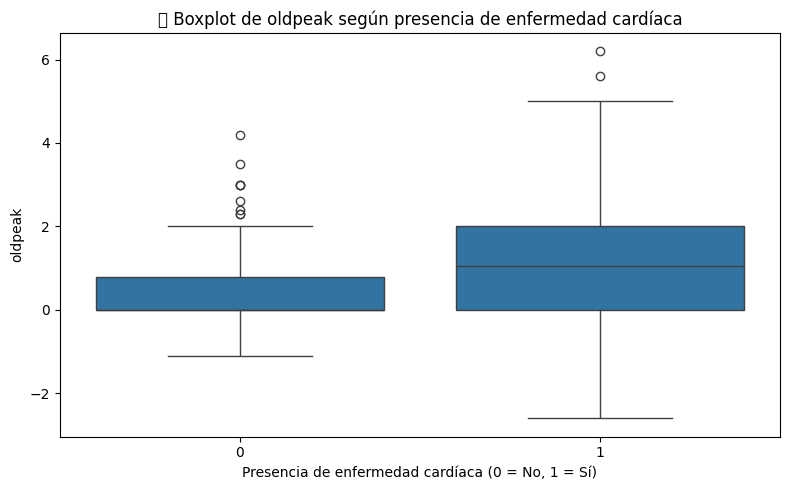

In [ ]:
# Asegurarse de que todo sea numérico (por si hay valores no convertidos)
df_box = df.copy()
df_box = df_box.apply(pd.to_numeric, errors='coerce')

# Eliminar columnas dummies si no quieres incluirlas
# O bien filtrar por columnas originales
variables_numericas = [col for col in df_box.columns if col != 'target' and df_box[col].nunique() > 5]

# Crear boxplots para cada variable numérica respecto a 'target'
for var in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='target', y=var, data=df_box)
    plt.title(f'📦 Boxplot de {var} según presencia de enfermedad cardíaca')
    plt.xlabel('Presencia de enfermedad cardíaca (0 = No, 1 = Sí)')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()



Este bloque asegura que todas las columnas del DataFrame sean numéricas (convirtiendo valores no numéricos en `NaN` si es necesario), selecciona solo aquellas variables numéricas relevantes (excluyendo `target` y las que tienen pocos valores distintos), y luego genera gráficos de caja (boxplots) para cada una, comparando su distribución entre pacientes con y sin enfermedad cardíaca, lo que ayuda a identificar diferencias significativas entre ambos grupos.

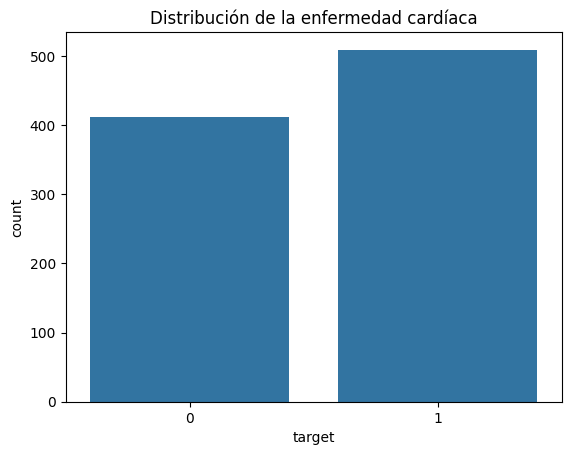

In [ ]:
# Crear columna binaria: 0 = no enfermedad, 1 = sí hay
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Visualizar
sns.countplot(x='target', data=df)
plt.title("Distribución de la enfermedad cardíaca")
plt.show()

Este bloque crea una nueva columna binaria llamada `target`, donde 0 indica ausencia de enfermedad cardíaca y 1 indica presencia, y luego utiliza un gráfico de barras (`countplot`) para visualizar cuántos casos hay en cada grupo, proporcionando una vista rápida del balance entre pacientes sanos y enfermos en el conjunto de datos.

<ipython-input-26-9441aaa0038b>:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


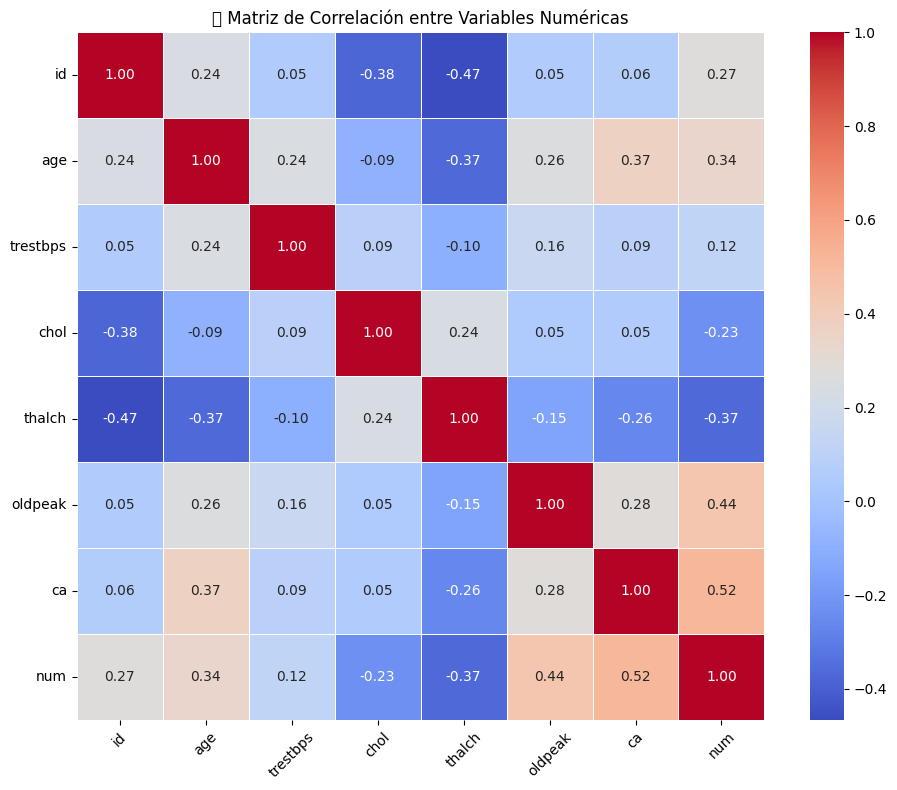

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas y calcular la matriz de correlación
numeric_df = df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.drop(columns=["target"], errors='ignore').corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("🔍 Matriz de Correlación entre Variables Numéricas")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Este bloque selecciona únicamente las columnas numéricas del DataFrame y calcula su matriz de correlación, luego la visualiza usando un heatmap con `seaborn`, donde los colores indican la fuerza y dirección de las relaciones entre variables, facilitando así la identificación de patrones o asociaciones significativas en los datos.

<p style="color:blue"><strong>3. PREPARACIÓN DE LOS DATOS</strong></p>

In [ ]:
# Eliminar columnas que no sirven para predecir
df.drop(columns=['id', 'dataset', 'num'], inplace=True)


Este bloque elimina del DataFrame las columnas `id`, `dataset` y `num` porque no aportan valor predictivo: `id` es solo un identificador, `dataset` indica la fuente de los datos y `num` ya fue transformada en la variable binaria `target` para el análisis.

In [ ]:
# Mapear variables binarias
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['fbs'] = df['fbs'].map({True: 1, False: 0})
df['exang'] = df['exang'].map({True: 1, False: 0})


Este bloque transforma variables categóricas binarias en valores numéricos: convierte 'Male' en 1 y 'Female' en 0 para la columna sex, y asigna 1 a True y 0 a False en las columnas fbs y exang, lo cual es esencial para que los modelos de machine learning puedan procesar estos datos correctamente.




In [ ]:
# Aplicar dummies a variables con varias categorías
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)


Este bloque convierte variables categóricas con múltiples categorías (`cp`, `restecg`, `slope`, `thal`) en variables numéricas mediante codificación *one-hot* (dummies), creando una columna para cada categoría menos una (por `drop_first=True`) para evitar multicolinealidad en modelos predictivos.

In [ ]:
from sklearn.impute import SimpleImputer

# Convertir 'ca' a numérica si tiene valores nulos como texto
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')

# Imputar 'ca' con la mediana
imputer = SimpleImputer(strategy='median')
df['ca'] = imputer.fit_transform(df[['ca']])


Este bloque convierte la columna ca a formato numérico, reemplazando cualquier valor no convertible (como texto nulo) por NaN, y luego utiliza SimpleImputer con la estrategia de mediana para rellenar esos valores faltantes, asegurando que los datos estén completos y listos para su uso en modelos.










In [ ]:
from sklearn.preprocessing import StandardScaler

# Estas son las variables numéricas que queremos escalar
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']  # ¡Ojo! 'thalch', no 'thalach'

# Aplicar escalado
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


Este bloque utiliza `StandardScaler` de `sklearn` para estandarizar ciertas variables numéricas, transformándolas a una escala con media 0 y desviación estándar 1, lo cual es fundamental para que muchos modelos de machine learning funcionen correctamente y no se vean sesgados por diferencias de escala entre las variables.

In [ ]:
print(df.head())
print(df.info())


        age  sex  trestbps      chol  fbs    thalch  exang   oldpeak  \
0  1.007386    1  0.675287  0.305908  1.0  0.480653    0.0  1.303159   
1  1.432034    1  1.462483  0.784599  0.0 -1.140262    1.0  0.569611   
2  1.432034    1 -0.636705  0.269780  0.0 -0.329805    1.0  1.578239   
3 -1.752828    1 -0.111908  0.459450  0.0  1.908602    0.0  2.403480   
4 -1.328180    0 -0.111908  0.043982  0.0  1.329704    0.0  0.477918   

         ca  target  cp_atypical angina  cp_non-anginal  cp_typical angina  \
0 -0.361400       0               False           False               True   
1  4.411152       1               False           False              False   
2  2.820301       1               False           False              False   
3 -0.361400       0               False            True              False   
4 -0.361400       0                True           False              False   

   restecg_normal  restecg_st-t abnormality  slope_flat  slope_upsloping  \
0           False     

Este bloque muestra las primeras filas del DataFrame (`df.head()`) para confirmar cómo lucen los datos después del procesamiento, y usa `df.info()` para verificar el tipo de datos, cantidad de valores no nulos y estructura general del conjunto, permitiendo comprobar que las transformaciones (escalado, imputación, codificación) se aplicaron correctamente.

In [ ]:
# Crear una copia del DataFrame, incluyendo todos los cambios realizados
df_copia = df.copy()

# Exportar la copia del DataFrame con un nombre diferente para evitar sobrescribir
df_copia.to_csv('/content/heart_disease_uci_modificado.csv', index=False)

PARTE 4 ENTREGA 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Clasificadores
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# 1) Recarga el CSV (ya tiene 'target' y las dummies)
df = pd.read_csv('/content/heart_disease_uci_modificado.csv')
df


,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.007386,1,0.675287,0.305908,1.0,0.480653,0.0,1.303159,-0.361400,0,False,False,True,False,False,False,False,False,False
1,1.432034,1,1.462483,0.784599,0.0,-1.140262,1.0,0.569611,4.411152,1,False,False,False,False,False,True,False,True,False
2,1.432034,1,-0.636705,0.269780,0.0,-0.329805,1.0,1.578239,2.820301,1,False,False,False,False,False,True,False,False,True
3,-1.752828,1,-0.111908,0.459450,0.0,1.908602,0.0,2.403480,-0.361400,0,False,True,False,True,False,False,False,True,False
4,-1.328180,0,-0.111908,0.043982,0.0,1.329704,0.0,0.477918,-0.361400,0,True,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.051927,0,-0.269347,1.209099,1.0,0.635026,0.0,-0.805791,-0.361400,1,False,False,False,False,True,False,False,False,False
916,0.901224,1,NaN,-0.543092,0.0,NaN,NaN,NaN,-0.361400,0,False,False,True,False,True,False,False,False,False
917,0.158089,1,-0.531745,0.215589,1.0,-1.449008,0.0,-0.805791,-0.361400,1,False,False,False,False,True,False,False,False,False
918,0.476575,1,NaN,1.678758,1.0,NaN,NaN,NaN,-0.361400,0,False,False,False,False,False,False,False,False,False


In [ ]:
# 2) Imputa NaN en numéricas con la media
num_cols = df.select_dtypes(include=['float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [ ]:
# 3) Separa X e y (solo quitamos 'target')
X = df.drop(['target'], axis=1)
y = df['target']

# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 5) Define y entrena los modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree":       DecisionTreeClassifier(),
    "Random Forest":       RandomForestClassifier(),
    "Gradient Boosting":   GradientBoostingClassifier(),
    "Naive Bayes":         GaussianNB(),
    "SVM":                 SVC(probability=True),
    "KNN":                 KNeighborsClassifier(),
    "MLP (Neural Net)":    MLPClassifier(max_iter=2000),
    "XGBoost":             XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM":            LGBMClassifier()
}

results = []
for name, model in models.items():
    pipe = make_pipeline(StandardScaler(), model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    results.append({
        "Model":     name,
        "Accuracy":  accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall":    recall_score(y_test, y_pred),
        "F1 Score":  f1_score(y_test, y_pred)
    })

# 6) Muestra resultados ordenados por F1
results_df = pd.DataFrame(results).sort_values('F1 Score', ascending=False)
print(results_df)
print("\nTop 2 modelos:")
print(results_df.head(2))



[LightGBM] [Info] Number of positive: 356, number of negative: 288
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 644, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552795 -> initscore=0.211970
[LightGBM] [Info] Start training from score 0.211970
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:50:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Random Forest: Con un Accuracy de 0.836957, Precision de 0.855263 y Recall de 0.849673, es un modelo robusto y con buen desempeño en clasificación binaria.

SVM : Con un Accuracy de 0.836957, Precision de 0.837500, y Recall de 0.875817. Aunque tiene un rendimiento ligeramente inferior al de Random Forest, las redes neuronales pueden ser muy poderosas y ofrecen la capacidad de aprender patrones complejos de los datos.

Estos dos modelos son bastante sólidos y, además, cubren enfoques distintos: Random Forest es un modelo basado en árboles de decisión y es relativamente sencillo de ajustar, mientras que MLP es una red neuronal que podría beneficiarse de ajustes finos y tiene un rendimiento competitivo en comparación con otros modelos.

despues de realizar las pruebas correspondientes elegimos quedarnos con el modelo de random forest ya que resulta ser superior a svm en practicamente todas las categorias tanto en accuracy (aqui estamos separando a los pacientes que tienen y no tienen una enfermedad y se esta midiendo que tan correcto fue la prediccion en esta oportunidad la prediccion tuvo un 83.6957% ) como en precision (de los paciecientes que ya identificamos de manera correcta estamos revisando si realmente fueron correctamente identificados en esta oportunidad despues de pasar por el accuracy los pacientes diagnoticados correctamente fueron del  855263% ) y en f1 (lo estamos utilizado para determinar y reducir los diagnosticos erroneos que se clasifican como enfermos a quienes estan sanos y disminuir casos de pacientes con enfermedad real que pasan desapercibidos por el sistema en este caso se alcanzo un 85% de precision   ) que a mi parecer son los valores mas importantes